In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score
from sklearn.ensemble import ExtraTreesClassifier

from data import *
from helpers import *


In [2]:
# Automated way to create labeled dataset
#directory='/../data_gated/'
#columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#create_labeled_dataset(directory,columns)

In [3]:
directory='/../data_gated/'
fileName='all_event/GL53_UP_2A.fcs'
data = load_file(fileName, directory)

In [4]:
data_df = pd.DataFrame(data=data, columns=data.channels)

In [5]:
data_df.shape

(1898, 12)

In [6]:
data_df.describe()

,FSC-H,SSC-H,B530-H,B572-H,B675-H,FSC-A,SSC-A,B530-A,B572-A,B675-A,Width,Time
count,1898.000000,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.0
mean,11261.881836,3.955664e+04,14137.167969,4196.788086,4326.112305,2924.793945,10294.613281,1.677182e+04,4987.258789,5029.241211,23.807034,60493772.0
std,31326.855469,7.075362e+04,30667.376953,7709.301758,7171.506348,8722.607422,19255.326172,3.998809e+04,10251.704102,9624.669922,6.706486,33297648.0
min,503.000000,0.000000e+00,3001.000000,360.000000,57.000000,27.000000,-671.000000,1.814000e+03,372.000000,109.000000,11.750000,175251.0
25%,1723.250000,9.890500e+03,4327.250000,1796.250000,1915.500000,385.500000,2320.500000,4.383000e+03,1914.000000,2059.500000,18.625000,31943201.0
50%,3937.500000,2.025350e+04,6724.500000,2857.000000,3130.000000,957.000000,5152.000000,7.371000e+03,3200.000000,3470.000000,22.750000,60990022.0
75%,10126.500000,4.281850e+04,13113.500000,4480.750000,5134.750000,2563.000000,11005.500000,1.524675e+04,5245.500000,5724.750000,27.750000,88792496.0
max,529406.000000,1.186901e+06,873270.000000,252727.000000,213873.000000,174884.000000,306065.000000,1.175428e+06,344178.000000,297353.000000,74.375000,118892952.0


In [7]:
# Summary of index, datatypes and non-null values of each column 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FSC-H   1898 non-null   float32
 1   SSC-H   1898 non-null   float32
 2   B530-H  1898 non-null   float32
 3   B572-H  1898 non-null   float32
 4   B675-H  1898 non-null   float32
 5   FSC-A   1898 non-null   float32
 6   SSC-A   1898 non-null   float32
 7   B530-A  1898 non-null   float32
 8   B572-A  1898 non-null   float32
 9   B675-A  1898 non-null   float32
 10  Width   1898 non-null   float32
 11  Time    1898 non-null   float32
dtypes: float32(12)
memory usage: 89.1 KB


In [8]:
# Number of unique values in each column
print(data_df.nunique())

FSC-H     1727
SSC-H     1869
B530-H    1735
B572-H    1628
B675-H    1698
FSC-A     1399
SSC-A     1790
B530-A    1786
B572-A    1671
B675-A    1691
Width      227
Time      1898
dtype: int64


## Feature selection



In [9]:
#Files
file = '../labeled_dataset.backup/GL53_UP_2A.csv'
df_labeled = pd.read_csv(file)
X,y = split_input_output(df_labeled,target_feature='label')

## Feature importance
Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02678273 0.01685522 0.141022   0.10333465 0.19043193 0.01983581
 0.01701845 0.13068228 0.08415359 0.14353451 0.12634884]


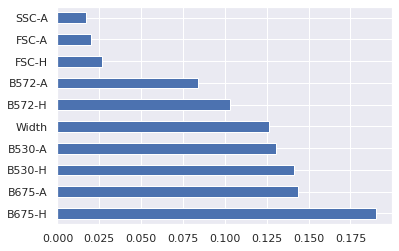

In [10]:

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Univariate Selection 
Compute the ANOVA F-value for the provided sample.

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs      Score
2   B530-H  80.887004
7   B530-A  76.568026
10   Width  62.908821
3   B572-H  61.236287
8   B572-A  56.344656
6    SSC-A  51.244630
1    SSC-H  49.913385
0    FSC-H  41.727347
5    FSC-A  38.909438
4   B675-H  29.490369


In [12]:
#Log transformation
data_df_plot = data_df.copy()
data_df_plot['FSC-H'] = np.log(data_df['FSC-H'] + 1)
data_df_plot['SSC-H'] = np.log(data_df['SSC-H'] + 1)
data_df_plot['B530-H'] = np.log(data_df['B530-H'] + 1)
data_df_plot['B572-H'] = np.log(data_df['B572-H'] + 1)
data_df_plot['B675-H'] = np.log(data_df['B675-H'] + 1)
data_df_plot['FSC-A'] = np.log(data_df['FSC-A'] + 1)
data_df_plot['SSC-A'] = np.log(data_df['SSC-A'] + 1)
data_df_plot['B530-A'] = np.log(data_df['B530-A'] + 1)
data_df_plot['B572-A'] = np.log(data_df['B572-A'] + 1)
data_df_plot['B675-A'] = np.log(data_df['B675-A'] + 1)
data_df_plot['Width'] = np.log(data_df['Width'] + 1)
data_df_plot['Time'] = np.log(data_df['Time'] + 1)


/home/mika/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


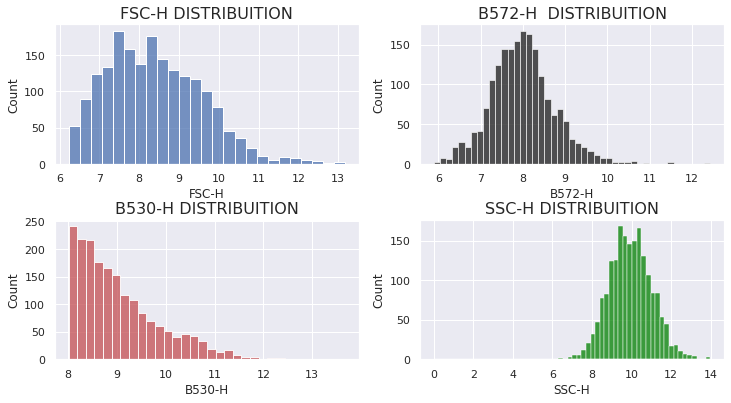

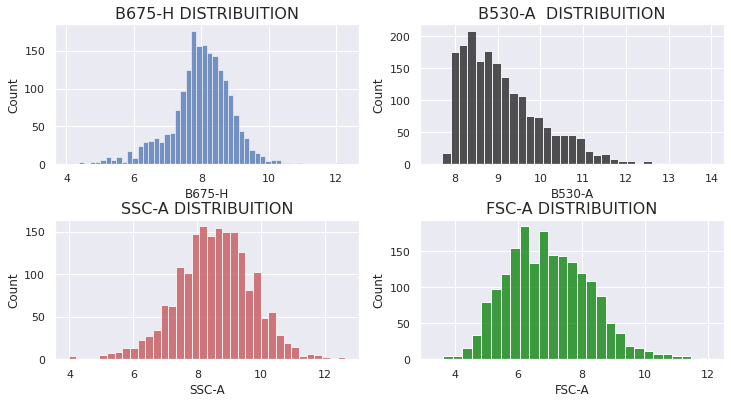

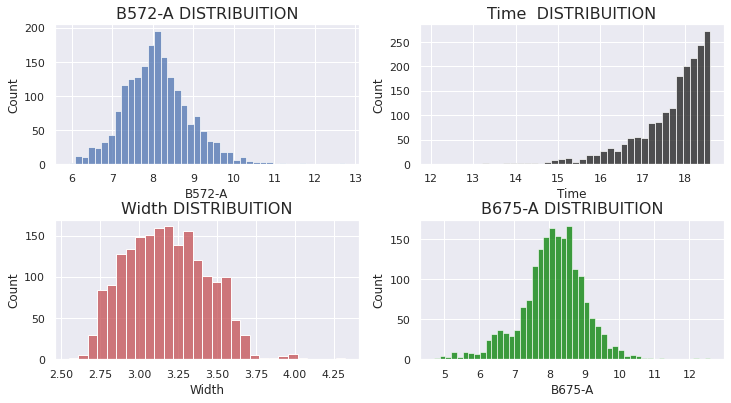

In [13]:
# Create a new figure with a width of 12 and a height of 6
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['FSC-H'])
g1.set_title("FSC-H DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['SSC-H'],color='green')
g2.set_title('SSC-H DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['B530-H'], color='r')
g3.set_title("B530-H DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['B572-H'], color='k')
g4.set_title("B572-H  DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['B675-H'])
g1.set_title("B675-H DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['FSC-A'],color='green')
g2.set_title('FSC-A DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['SSC-A'], color='r')
g3.set_title("SSC-A DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['B530-A'], color='k')
g4.set_title("B530-A  DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['B572-A'])
g1.set_title("B572-A DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['B675-A'],color='green')
g2.set_title('B675-A DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['Width'], color='r')
g3.set_title("Width DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['Time'], color='k')
g4.set_title("Time  DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

Analyse

In [14]:
corr_df = data_df[data_df.columns]
cor = corr_df.corr(method='pearson')
print(cor)

           FSC-H     SSC-H    B530-H    B572-H    B675-H     FSC-A     SSC-A  \
FSC-H   1.000000  0.647674  0.333631  0.460289  0.539540  0.994096  0.669421   
SSC-H   0.647674  1.000000  0.163549  0.256046  0.327371  0.642282  0.991047   
B530-H  0.333631  0.163549  1.000000  0.934409  0.683171  0.389680  0.218114   
B572-H  0.460289  0.256046  0.934409  1.000000  0.893616  0.518543  0.313771   
B675-H  0.539540  0.327371  0.683171  0.893616  1.000000  0.585672  0.376575   
FSC-A   0.994096  0.642282  0.389680  0.518543  0.585672  1.000000  0.673386   
SSC-A   0.669421  0.991047  0.218114  0.313771  0.376575  0.673386  1.000000   
B530-A  0.340315  0.169140  0.999176  0.939651  0.692784  0.398079  0.225529   
B572-A  0.454095  0.251010  0.937042  0.998563  0.885144  0.515002  0.311452   
B675-A  0.528640  0.314106  0.713137  0.910809  0.996182  0.579457  0.368150   
Width   0.154607  0.096949  0.665840  0.569098  0.364424  0.188184  0.151421   
Time   -0.009375 -0.003806  0.023674  0.

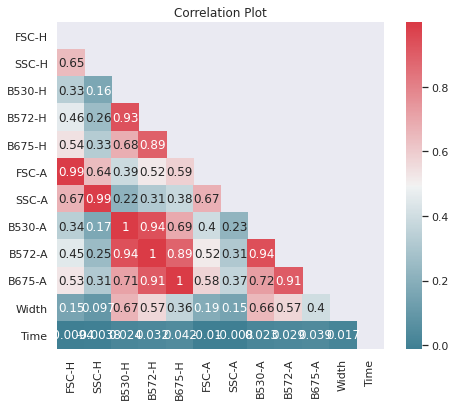

In [15]:
mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

           FSC-H     SSC-H    B530-H    B572-H    B675-H     FSC-A     SSC-A  \
FSC-H   1.000000  0.647674  0.333631  0.460289  0.539540  0.994096  0.669421   
SSC-H   0.647674  1.000000  0.163549  0.256046  0.327371  0.642282  0.991047   
B530-H  0.333631  0.163549  1.000000  0.934409  0.683171  0.389680  0.218114   
B572-H  0.460289  0.256046  0.934409  1.000000  0.893616  0.518543  0.313771   
B675-H  0.539540  0.327371  0.683171  0.893616  1.000000  0.585672  0.376575   
FSC-A   0.994096  0.642282  0.389680  0.518543  0.585672  1.000000  0.673386   
SSC-A   0.669421  0.991047  0.218114  0.313771  0.376575  0.673386  1.000000   
B530-A  0.340315  0.169140  0.999176  0.939651  0.692784  0.398079  0.225529   
B572-A  0.454095  0.251010  0.937042  0.998563  0.885144  0.515002  0.311452   
B675-A  0.528640  0.314106  0.713137  0.910809  0.996182  0.579457  0.368150   
Width   0.154607  0.096949  0.665840  0.569098  0.364424  0.188184  0.151421   
Time   -0.009375 -0.003806  0.023674  0.

<AxesSubplot:title={'center':'Correlation Heat Map'}>

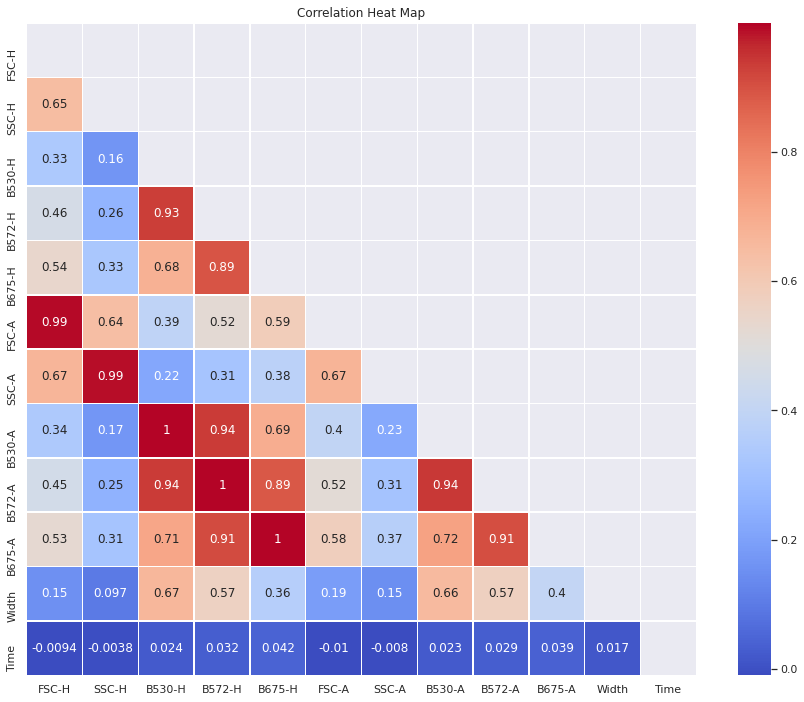

In [16]:
corr_df = data_df[data_df.columns]
cor = corr_df.corr(method='pearson')
print(cor)

df_visualize = data_df.copy()
fig, ax = plt.subplots(figsize=(15,12)) # create sublots
plt.title("Correlation Heat Map") # set the fig title
mask = np.triu(df_visualize.corr()) # create upper triangle of an array

sns.heatmap(df_visualize.corr(), annot = True, ax=ax, mask=mask, cmap= 'coolwarm', linewidths=.5) # visualize

This plot allows us to see whether some features are strongly correlated among them. For instance, B572-A and B675-A are strongly correlated (0.98), as well as B675-H and B675-A (0.99). These pairs therefore seem to contain redudant information and it would not make sense to select them together

## Features we selected last semester

In [29]:
#file = '../labeled_dataset/GL55_DN_3A.csv'
columns=['B530-H', 'B530-A', 'B572-H','B572-A', 'B675-H','B675-A','Width']
#X,y = preprocess(file,columns)

In [30]:
corr_df = data_df[columns]
cor = corr_df.corr(method='pearson')
print(cor)

          B530-H    B530-A    B572-H    B572-A    B675-H    B675-A     Width
B530-H  1.000000  0.999176  0.934409  0.937042  0.683171  0.713137  0.665840
B530-A  0.999176  1.000000  0.939651  0.943691  0.692784  0.723521  0.655936
B572-H  0.934409  0.939651  1.000000  0.998563  0.893616  0.910809  0.569098
B572-A  0.937042  0.943691  0.998563  1.000000  0.885144  0.905915  0.572438
B675-H  0.683171  0.692784  0.893616  0.885144  1.000000  0.996182  0.364424
B675-A  0.713137  0.723521  0.910809  0.905915  0.996182  1.000000  0.401743
Width   0.665840  0.655936  0.569098  0.572438  0.364424  0.401743  1.000000


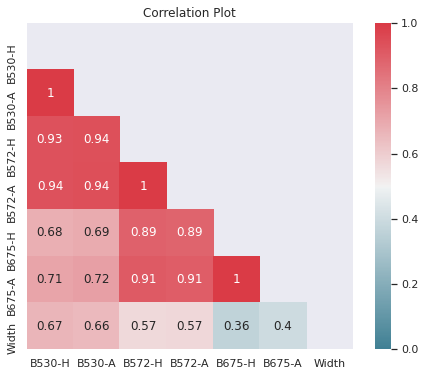

In [31]:
mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax,vmin=0,vmax=1)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

## Features freshly selected

In [32]:
columns=['B530-H', 'B572-H','B675-H','Width']


In [33]:
corr_df = data_df[columns]
cor = corr_df.corr(method='pearson')
print(cor)

          B530-H    B572-H    B675-H     Width
B530-H  1.000000  0.934409  0.683171  0.665840
B572-H  0.934409  1.000000  0.893616  0.569098
B675-H  0.683171  0.893616  1.000000  0.364424
Width   0.665840  0.569098  0.364424  1.000000


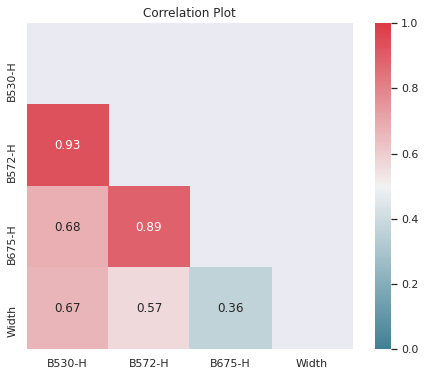

In [34]:

mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax,vmin=0,vmax=1)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

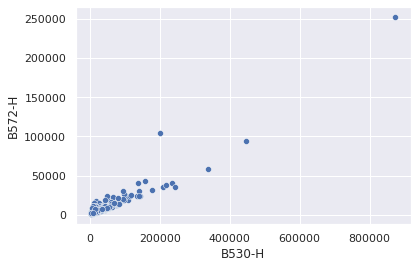

In [23]:
sns.scatterplot(data=data_df, x="B530-H", y="B572-H")

In [24]:
data_df.shape

(1898, 12)

We can see we have outliers

In [25]:
data_df_no_outliers = remove_outliers(data_df)

In [26]:
data_df_no_outliers.shape

(1833, 12)

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

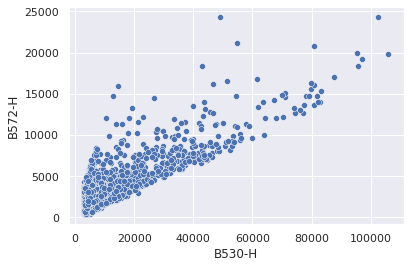

In [27]:
sns.scatterplot(data=data_df_no_outliers, x="B530-H", y="B572-H")

In [28]:
data_df_no_outliers.describe()

,FSC-H,SSC-H,B530-H,B572-H,B675-H,FSC-A,SSC-A,B530-A,B572-A,B675-A,Width,Time
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.0
mean,7397.808594,31473.410156,11935.312500,3625.031006,3831.041992,1876.379150,8066.709961,13905.187500,4238.360840,4367.216797,23.494680,60579108.0
std,9845.722656,33632.585938,13813.712891,2952.300293,3098.210693,2584.135742,9136.620117,17361.425781,3767.539795,3757.451416,6.096811,33309800.0
min,503.000000,0.000000,3001.000000,360.000000,57.000000,27.000000,-671.000000,1814.000000,372.000000,109.000000,11.750000,175251.0
25%,1678.000000,9637.000000,4301.000000,1777.000000,1878.000000,379.000000,2251.000000,4372.000000,1879.000000,2015.000000,18.500000,32203660.0
50%,3717.000000,19466.000000,6669.000000,2798.000000,3029.000000,918.000000,4894.000000,7251.000000,3137.000000,3361.000000,22.625000,61092576.0
75%,9253.000000,39430.000000,12674.000000,4305.000000,4953.000000,2334.000000,10245.000000,14773.000000,5056.000000,5475.000000,27.625000,88956184.0
max,89896.000000,250723.000000,105918.000000,24357.000000,25826.000000,22096.000000,65288.000000,131082.000000,30031.000000,32050.000000,42.375000,118892952.0
